
Group A: Anais, Andreea y Mar

Countries assigned:
    Argentina, Russia, Colombia, Chile and Spain


Option C

1. Document all steps. Structure your code to keep it cleaned using good practices.

DONE: 2. Collect Coronavirus Data. It is mandatory that in each call, it collects the last updated data.

MAR: 3. Determine and explain if the data is cleaned. If not, then clean it.

4. Create an API that returns a Json with the logic explained for your group. The flask server must be executed running the src/api/server.py file.
5. Get the jsons generated from your annexed group and plot it. First, try to connect to the private ip of your     annexed group. If it is not possible because of physical issues, then simply use what they generate copying it. If your annexed group cannot give you the necessary json, then annotate it, use the json of another group.

ANAIS: 6. Show different tendencies for each column in your dataset. Show, vertically, the start date and end date of the alarm state in each plot. If there is no alarm state, then show only the start date.

ANDREEA: 7. Draw the workflow of your program. You can use free tools.

8. Per country, which are the columns that are more related find the correlation between columns with the           correlation matrix.

DONE: 9. Use a different github repository adding all group participants with write permissions. Use that repository to manage the delivery code and resources. It is mandatory that every student of the group does, at least,five commits/push.

    10. Answer the questions:
        a. What position do your countries occupe respect to the number of total infected, total deaths and                 total recoveries?
        b. What can you conclude about your data study?
        c. Are there outliers or some rare data?



Our API must offer data to Group B and receive it from Group F, as follows:

    We have to offer a json(df):
    - Group A: it must return a json with one key “n_c_averages” that represents
    the mean of the “new_cases” per day of all of your countries.


    We should receive a json(df):
    - Group F: it must return a json with one key “n_t_averages” that represents the
    mean of the “new_tests” per day of all your countries.
    
Option B.... to be continued

In [2]:
import pandas as pd
import seaborn as sns
from utils.folders_tb import jsonlink_df
from utils.mining_data_tb import filter_df, df_covid, remove_outlier, datetime
from utils.visualization_tb import heatmap_df, detect_outliers_df, plot_per_column_distribution

In [3]:
covid = jsonlink_df('https://covid.ourworldindata.org/data/owid-covid-data.json').T
covid

,continent,location,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,data,extreme_poverty,female_smokers,male_smokers
AFG,Asia,Afghanistan,38928341.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,37.746,0.500,64.83,0.498,"[{'date': '2020-02-24', 'total_cases': 1.0, 'n...",NaN,NaN,NaN
ALB,Europe,Albania,2877800.0,104.871,38.0,13.188,8.643,11803.431,304.195,10.08,NaN,2.890,78.57,0.785,"[{'date': '2020-03-09', 'total_cases': 2.0, 'n...",1.1,7.100,51.200
DZA,Africa,Algeria,43851043.0,17.348,29.1,6.211,3.857,13913.839,278.364,6.73,83.741,1.900,76.88,0.754,"[{'date': '2020-02-25', 'total_cases': 1.0, 'n...",0.5,0.700,30.400
AND,Europe,Andorra,77265.0,163.755,NaN,NaN,NaN,NaN,109.135,7.97,NaN,NaN,83.73,0.858,"[{'date': '2020-03-02', 'total_cases': 1.0, 'n...",NaN,29.000,37.800
AGO,Africa,Angola,32866268.0,23.890,16.8,2.405,1.362,5819.495,276.045,3.94,26.664,NaN,61.15,0.581,"[{'date': '2020-03-20', 'total_cases': 1.0, 'n...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VNM,Asia,Vietnam,97338583.0,308.127,32.6,7.150,4.718,6171.884,245.465,6.00,85.847,2.600,75.40,0.694,"[{'date': '2020-01-23', 'total_cases': 2.0, 'n...",2.0,1.000,45.900
OWID_WRL,NaN,World,7794798729.0,58.045,30.9,8.696,5.355,15469.207,233.070,8.51,60.130,2.705,72.58,NaN,"[{'date': '2020-01-22', 'total_cases': 557.0, ...",10.0,6.434,34.635
YEM,Asia,Yemen,29825968.0,53.508,20.3,2.922,1.583,1479.147,495.003,5.35,49.542,0.700,66.12,0.452,"[{'date': '2020-04-10', 'total_cases': 1.0, 'n...",18.8,7.600,29.200
ZMB,Africa,Zambia,18383956.0,22.995,17.7,2.480,1.542,3689.251,234.499,3.94,13.938,2.000,63.89,0.588,"[{'date': '2020-03-18', 'total_cases': 2.0, 'n...",57.5,3.100,24.700


In [4]:
covid=filter_df(covid,'location','Argentina','Russia', 'Colombia', 'Chile', 'Spain')
covid

,continent,location,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,data,extreme_poverty,female_smokers,male_smokers
ARG,South America,Argentina,45195777.0,16.177,31.9,11.198,7.441,18933.907,191.032,5.50,NaN,5.00,76.67,0.825,"[{'date': '2020-01-01', 'total_tests': 4.0, 'n...",0.6,16.2,27.7
CHL,South America,Chile,19116209.0,24.282,35.4,11.087,6.938,22767.037,127.993,8.46,NaN,2.11,80.18,0.843,"[{'date': '2020-02-23', 'total_cases': 2.0, 'n...",1.3,34.2,41.5
COL,South America,Colombia,50882884.0,44.223,32.2,7.646,4.312,13254.949,124.240,7.44,65.386,1.71,77.29,0.747,"[{'date': '2020-03-06', 'total_cases': 1.0, 'n...",4.5,4.7,13.5
RUS,Europe,Russia,145934460.0,8.823,39.6,14.178,9.393,24765.954,431.297,6.18,NaN,8.05,72.58,0.816,"[{'date': '2020-01-31', 'total_cases': 2.0, 'n...",0.1,23.4,58.3
ESP,Europe,Spain,46754783.0,93.105,45.5,19.436,13.799,34272.360,99.403,7.17,NaN,2.97,83.56,0.891,"[{'date': '2020-02-01', 'total_cases': 1.0, 'n...",1.0,27.4,31.4


In [5]:
covid=df_covid(covid,val1="data")
covid

,continent,location,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,...,data.new_vaccinations_smoothed_per_million,data.new_vaccinations,data.weekly_icu_admissions,data.weekly_icu_admissions_per_million,data.weekly_hosp_admissions,data.weekly_hosp_admissions_per_million,data.icu_patients,data.icu_patients_per_million,data.hosp_patients,data.hosp_patients_per_million
0,South America,Argentina,45195777.0,16.177,31.9,11.198,7.441,18933.907,191.032,5.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,South America,Argentina,45195777.0,16.177,31.9,11.198,7.441,18933.907,191.032,5.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,South America,Argentina,45195777.0,16.177,31.9,11.198,7.441,18933.907,191.032,5.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,South America,Argentina,45195777.0,16.177,31.9,11.198,7.441,18933.907,191.032,5.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,South America,Argentina,45195777.0,16.177,31.9,11.198,7.441,18933.907,191.032,5.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1737,Europe,Spain,46754783.0,93.105,45.5,19.436,13.799,34272.360,99.403,7.17,...,1500.0,92764.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1738,Europe,Spain,46754783.0,93.105,45.5,19.436,13.799,34272.360,99.403,7.17,...,1501.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1739,Europe,Spain,46754783.0,93.105,45.5,19.436,13.799,34272.360,99.403,7.17,...,1502.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1740,Europe,Spain,46754783.0,93.105,45.5,19.436,13.799,34272.360,99.403,7.17,...,1503.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
covid= datetime(dt=covid, val1="data.date")
covid

,continent,location,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,...,data.new_vaccinations_smoothed_per_million,data.new_vaccinations,data.weekly_icu_admissions,data.weekly_icu_admissions_per_million,data.weekly_hosp_admissions,data.weekly_hosp_admissions_per_million,data.icu_patients,data.icu_patients_per_million,data.hosp_patients,data.hosp_patients_per_million
0,South America,Argentina,45195777.0,16.177,31.9,11.198,7.441,18933.907,191.032,5.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,South America,Argentina,45195777.0,16.177,31.9,11.198,7.441,18933.907,191.032,5.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,South America,Argentina,45195777.0,16.177,31.9,11.198,7.441,18933.907,191.032,5.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,South America,Argentina,45195777.0,16.177,31.9,11.198,7.441,18933.907,191.032,5.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,South America,Argentina,45195777.0,16.177,31.9,11.198,7.441,18933.907,191.032,5.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1737,Europe,Spain,46754783.0,93.105,45.5,19.436,13.799,34272.360,99.403,7.17,...,1500.0,92764.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1738,Europe,Spain,46754783.0,93.105,45.5,19.436,13.799,34272.360,99.403,7.17,...,1501.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1739,Europe,Spain,46754783.0,93.105,45.5,19.436,13.799,34272.360,99.403,7.17,...,1502.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1740,Europe,Spain,46754783.0,93.105,45.5,19.436,13.799,34272.360,99.403,7.17,...,1503.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1742 entries, 0 to 1741
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   continent                                   1742 non-null   object        
 1   location                                    1742 non-null   object        
 2   population                                  1742 non-null   float64       
 3   population_density                          1742 non-null   float64       
 4   median_age                                  1742 non-null   float64       
 5   aged_65_older                               1742 non-null   float64       
 6   aged_70_older                               1742 non-null   float64       
 7   gdp_per_capita                              1742 non-null   float64       
 8   cardiovasc_death_rate                       1742 non-null   float64       
 9   diabetes

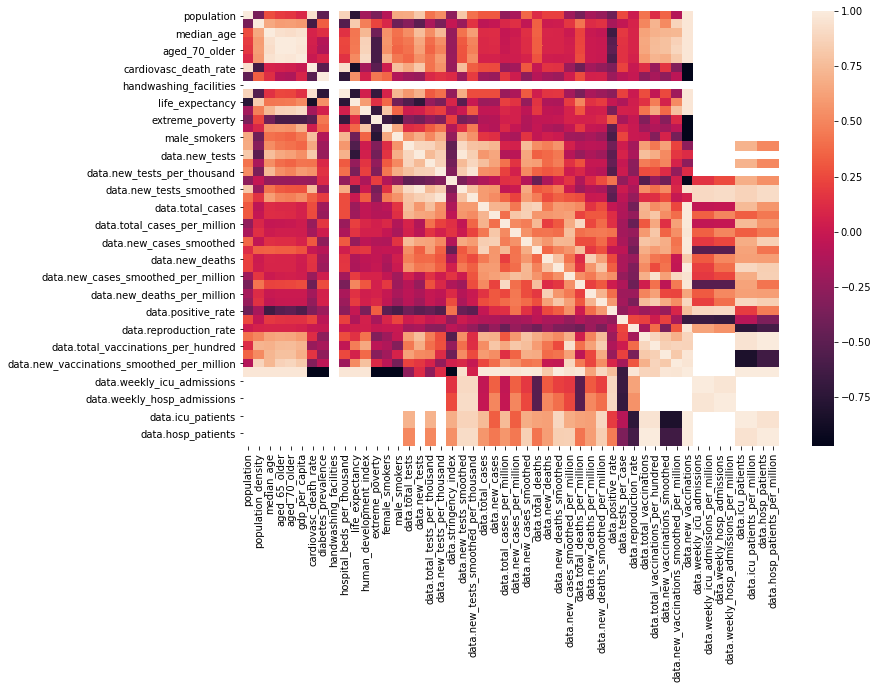

In [8]:
heatmap_df(df=covid, file_name='first_plot')

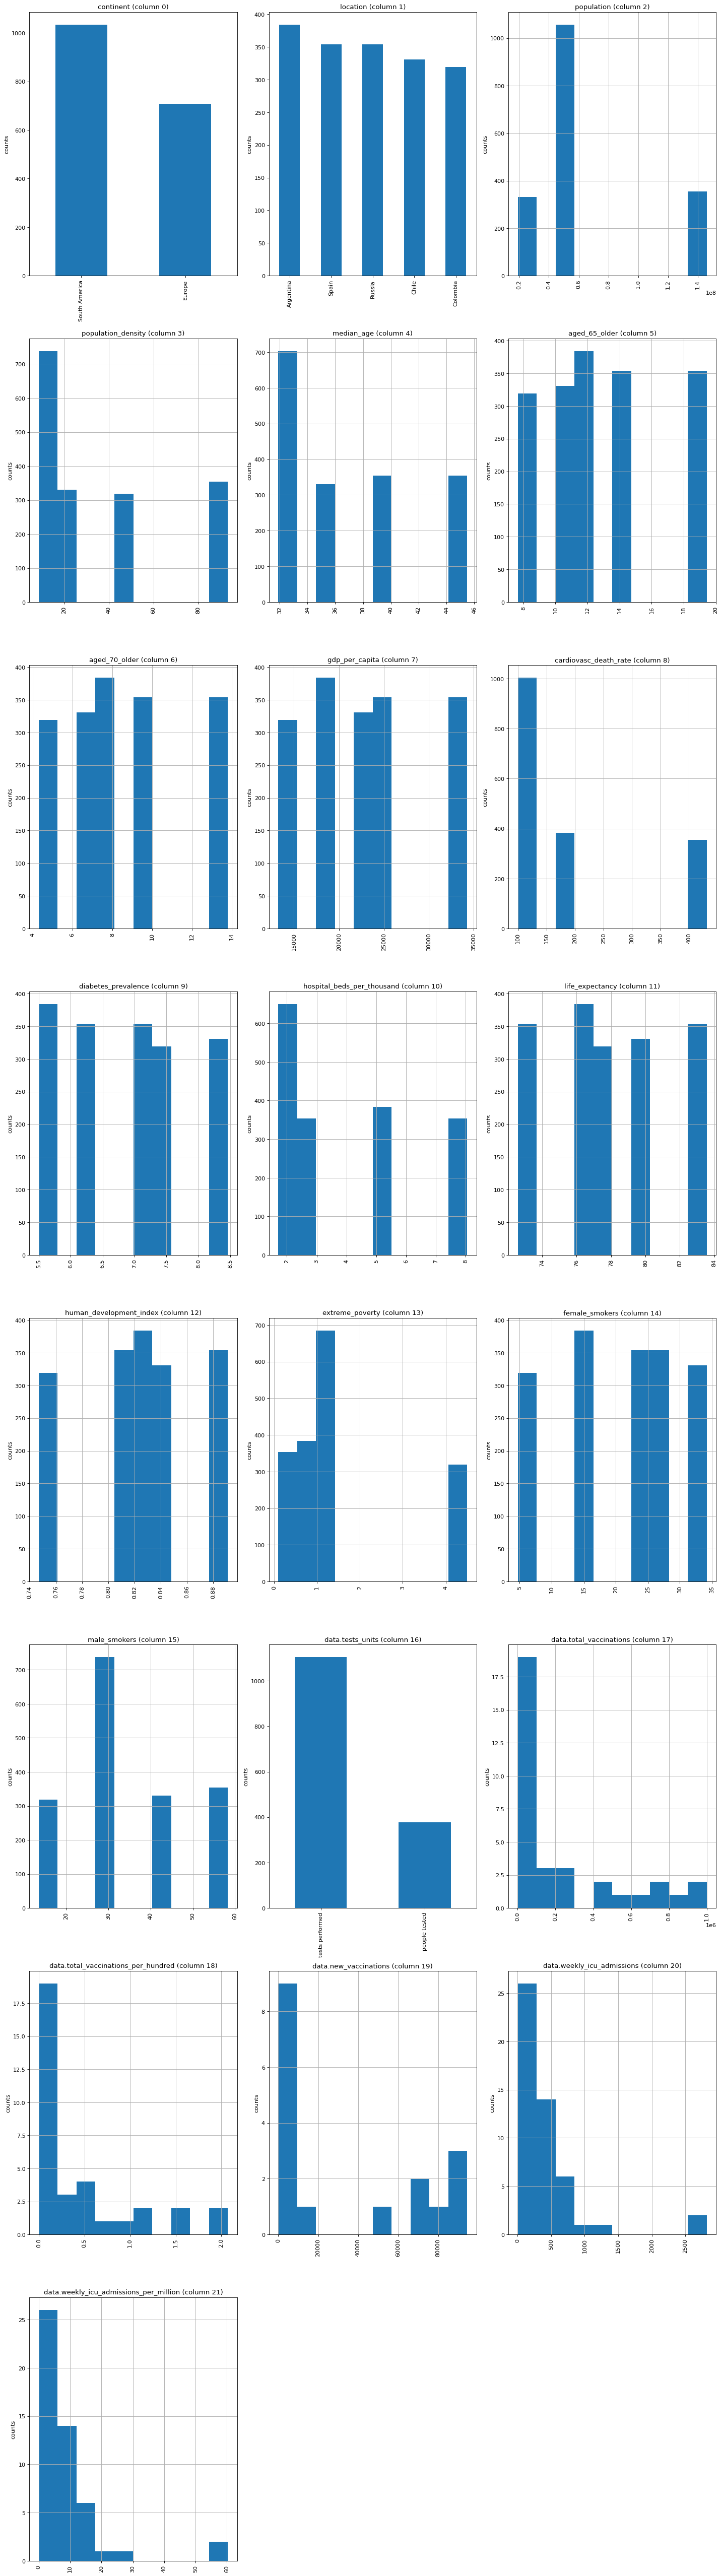

In [9]:
plot_per_column_distribution(covid,37,3,'hist one')

In [11]:
covid.isna().sum().sort_values(ascending=False)

data.new_vaccinations                         1725
data.total_vaccinations                       1708
data.total_vaccinations_per_hundred           1708
data.weekly_hosp_admissions_per_million       1692
data.weekly_hosp_admissions                   1692
data.weekly_icu_admissions_per_million        1692
data.weekly_icu_admissions                    1692
data.new_vaccinations_smoothed_per_million    1656
data.new_vaccinations_smoothed                1656
data.hosp_patients_per_million                1645
data.icu_patients                             1645
data.icu_patients_per_million                 1645
data.hosp_patients                            1645
handwashing_facilities                        1423
data.new_tests_per_thousand                    585
data.new_tests                                 585
data.total_tests                               533
data.total_tests_per_thousand                  533
data.tests_per_case                            360
data.positive_rate             